# MLX90640 Thermal Camera with CircuitPython
[Click here to visit the guide for this notebook!](https://learn.adafruit.com/jupyter-on-any-computer-with-circuitpython-and-mcp2221-ft232h/thermal-camera)

In [48]:
# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

 # Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-circuitpython-mlx90640 hidapi

In [49]:
import time
import board
import busio
import adafruit_mlx90640

i2c = busio.I2C(board.SCL, board.SDA, frequency=800000)

mlx = adafruit_mlx90640.MLX90640(i2c)
print("MLX addr detected on I2C!")

# Set refresh rate
mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_1_HZ
print("MLX refresh rate: ", pow(2, (mlx.refresh_rate-1)), "Hz")

Found 0 broken pixels, 0 outliers
MLX addr detected on I2C!
MLX refresh rate:  1 Hz


In [53]:
import numpy as np

# read in frame from thermal camera and split into 32 x 24 numpy array of thermal readings
frame = [0] * 768
mlx.getFrame(frame)
pixels = np.split(np.asarray(frame), 24)
# rotate it around so its right side
pixels = np.rot90(pixels, 3)
print(len(pixels[0]), "x", len(pixels))

24 x 32


<IPython.core.display.Javascript object>


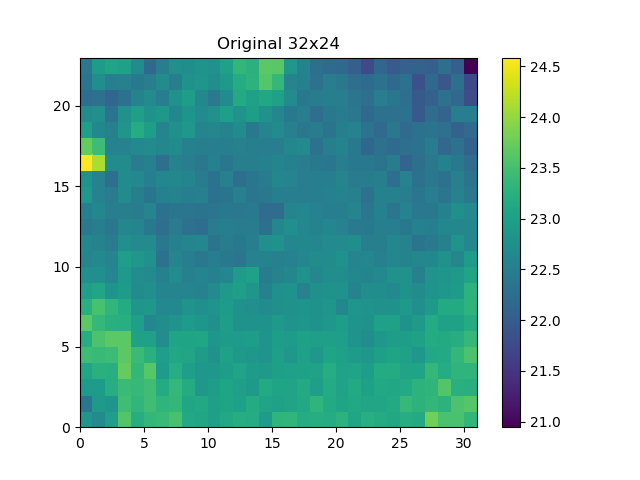

In [54]:
#%matplotlib notebook
import math
import time

from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.animation as animation

grid_x, grid_y = np.mgrid[0:31:32j, 0:23:24j]

plt.figure()
plt.pcolormesh(grid_x, grid_y, pixels)
plt.colorbar()
plt.title("Original 32x24")

plt.show()

<IPython.core.display.Javascript object>


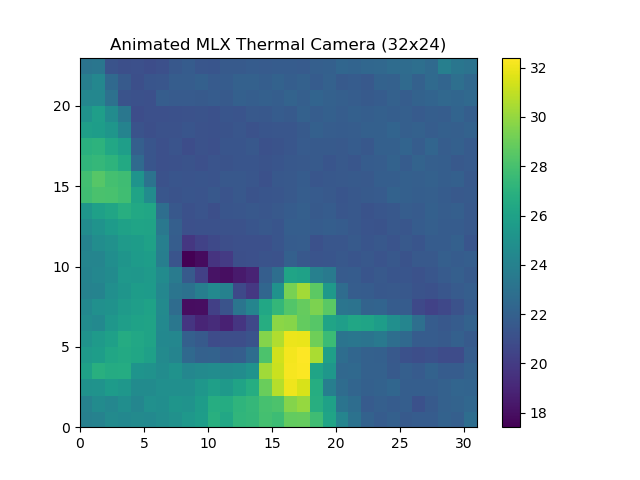

In [43]:
"""Animated MLX Thermal Camera Demo
"""
%matplotlib notebook

# Set up plot
fig, ax = plt.subplots()
grid_x, grid_y = np.mgrid[0:31:32j, 0:23:24j]

def animate(i):
    # read in frame from thermal camera and split into 32 x 24 numpy array of thermal readings
    frame = [0] * 768
    mlx.getFrame(frame)
    pixels = np.split(np.asarray(frame), 24)
    # rotate it around so its right side
    pixels = np.rot90(pixels, 3)
    
    # Clear the current figure
    plt.clf()
    
    # Create a color plot with a rectangular grid
    plt.pcolormesh(grid_x, grid_y, pixels)
    plt.colorbar()
    plt.title("Animated MLX Thermal Camera (32x24)")
    plt.show()
    plt.pause(0.05)

ani = animation.FuncAnimation(fig, animate)